# 異常検知①

[Anomaly Detection Toolkit (ADTK)](https://adtk.readthedocs.io/en/stable/index.html)を使った異常検知をしてみます。
オリジナルデータは[Numenta Anomaly Benchmark](https://github.com/numenta/NAB/blob/master/data/artificialWithAnomaly/art_daily_jumpsdown.csv)のものを使用しています。

In [1]:
import pandas as pd

s_train = pd.read_csv(
    "./training.csv", index_col="timestamp", parse_dates=True, squeeze=True
)
from adtk.data import validate_series

s_train = validate_series(s_train)
print(s_train)

timestamp
2014-04-01 00:00:00    18.090486
2014-04-01 00:05:00    20.359843
2014-04-01 00:10:00    21.105470
2014-04-01 00:15:00    21.151585
2014-04-01 00:20:00    18.137141
                         ...    
2014-04-14 23:35:00    18.269290
2014-04-14 23:40:00    19.087351
2014-04-14 23:45:00    19.594689
2014-04-14 23:50:00    19.767817
2014-04-14 23:55:00    20.479156
Freq: 5T, Name: value, Length: 4032, dtype: float64


C:\Users\nanja-win-ms\AppData\Local\Temp\ipykernel_2304\1451884284.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s_train = pd.read_csv("./training.csv", index_col="timestamp", parse_dates=True, squeeze=True)


[<Axes: >]

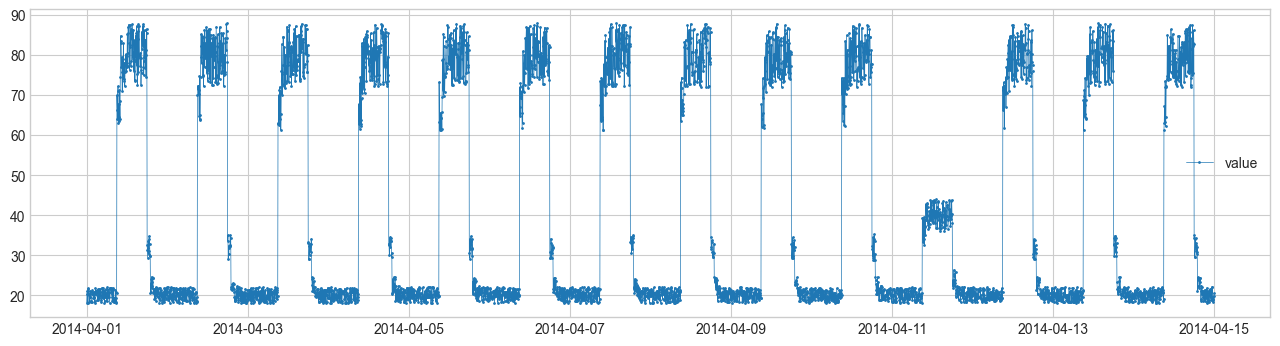

In [2]:
from adtk.visualization import plot

plot(s_train)

## 異常検知
[SeasonalAD](https://adtk.readthedocs.io/en/stable/notebooks/demo.html?highlight=SeasonalAD#SeasonalAD)を用いた異常検知を行います。他の手法は[Detector](https://adtk.readthedocs.io/en/stable/notebooks/demo.html?highlight=SeasonalAD#Detector)を参照してください。

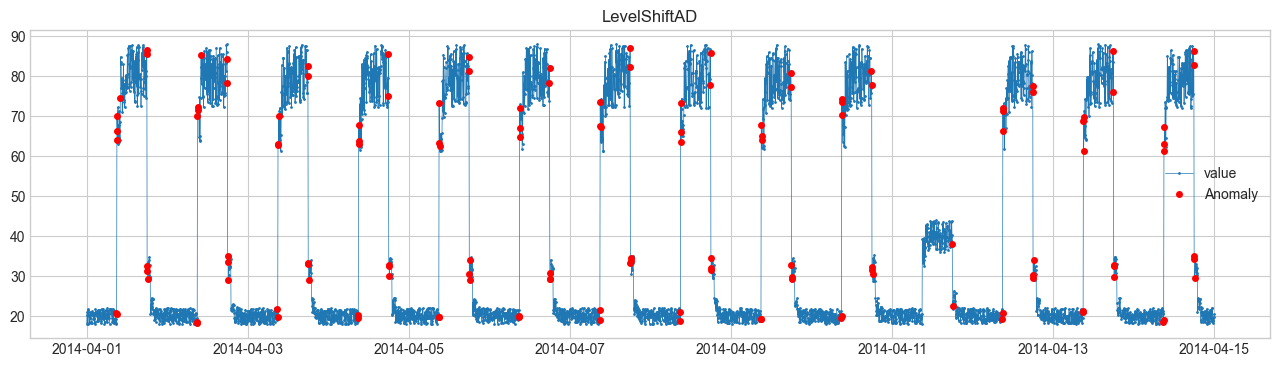

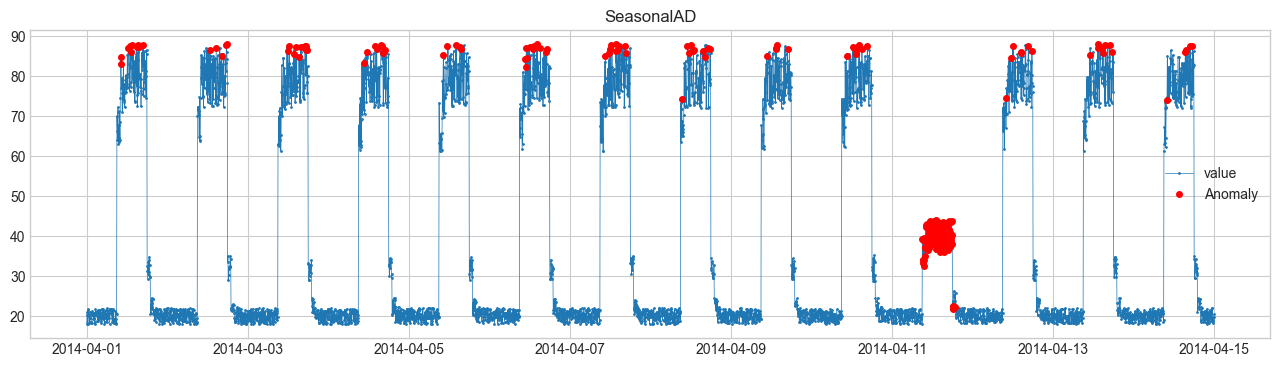

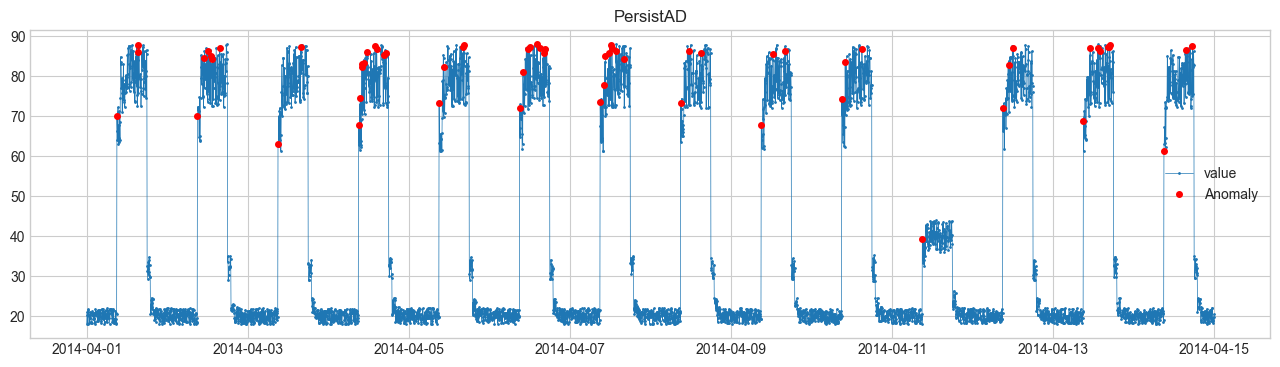

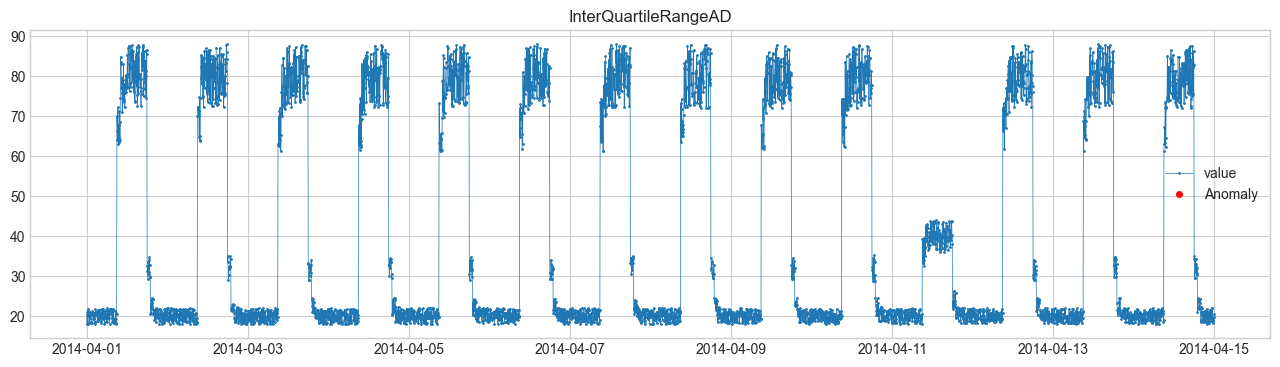

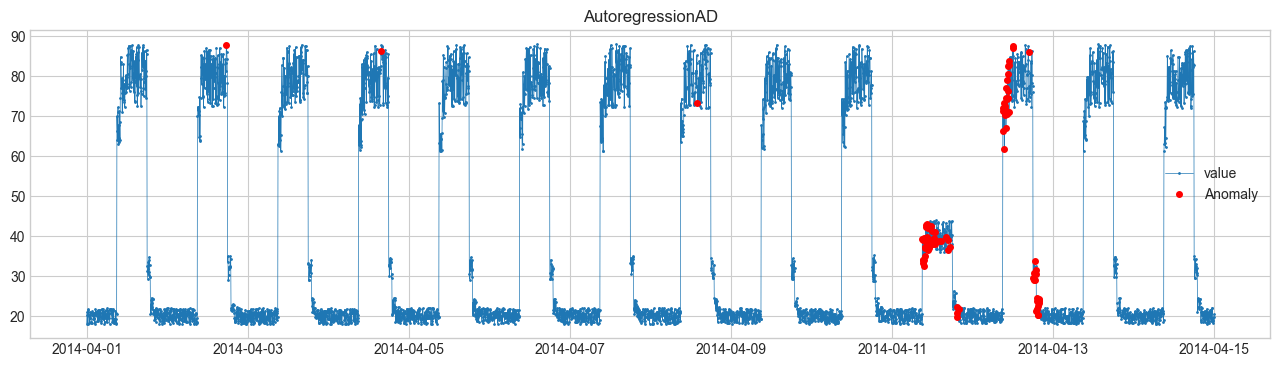

In [17]:
import matplotlib.pyplot as plt
from adtk.detector import (
    AutoregressionAD,
    InterQuartileRangeAD,
    LevelShiftAD,
    PersistAD,
    SeasonalAD,
)

model_dict = {
    "LevelShiftAD": LevelShiftAD(window=5),
    "SeasonalAD": SeasonalAD(),
    "PersistAD": PersistAD(c=3.0, side="positive"),
    "InterQuartileRangeAD": InterQuartileRangeAD(c=1.5),
    "AutoregressionAD": AutoregressionAD(n_steps=7 * 2, step_size=24, c=3.0),
}

for model_name, model in model_dict.items():
    anomalies = model.fit_detect(s_train)
    plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
    plt.title(model_name)
    plt.show()